In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Questão 6

6) O Bar do João vende bolinho de carne e por mês compra 2 toneladas de carne, 100kg de tempero, 400 litros de óleo, 20kg de sal e seu custo de operação (aluguel, funcionários e contas de água, energia e gás) é de R$ 15.000,00 

  Sendo que cada bolinho utiliza 100g de carne e o bar funciona 8hs por dia durante 6 dias na semana, qual seria sua estratégia para precificar cada bolinho? Qual seria o preço de venda? 

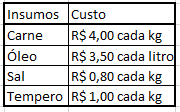

In [2]:
DF6 = pd.read_csv('Q6.csv', sep=';')
DF6.head()

,Qtd Vend / Hora,Preco Unitario
0,90,2.01
1,30,4.75
2,20,6.78
3,110,1.28
4,90,1.39


In [3]:
DF6.describe()

,Qtd Vend / Hora,Preco Unitario
count,500.00000,500.000000
mean,59.44000,3.782380
std,32.14581,3.167923
min,10.00000,1.100000
25%,30.00000,1.830000
50%,60.00000,2.450000
75%,90.00000,4.335000
max,110.00000,12.780000


In [4]:
DF6['Qtd Vend / Mês'] = DF6['Qtd Vend / Hora']*8*6*4
DF6.head()

,Qtd Vend / Hora,Preco Unitario,Qtd Vend / Mês
0,90,2.01,17280
1,30,4.75,5760
2,20,6.78,3840
3,110,1.28,21120
4,90,1.39,17280


Ao analisarmos a tabela, podemos verificar que projetando a quantidade vendida por hora, até o fim do mês, podemos encontrar valores irreais, visto que a quantidade máxima de bolinhos produzidos, está limitada pela quantidade de material adquirido
   
$$\text{nº bolinhos } = \frac{2\text{ toneladas}}{100 \text{ g/ bolinho}} = 20.000\text{ bolinhos}$$

Logo, precisamos levar isso em consideração e reajustar a coluna 'Qtd Vend / Mês'

In [5]:
cont = 0
for i in range (len(DF6['Qtd Vend / Mês'])):
    if DF6['Qtd Vend / Mês'].iloc[i] > 20000:
        cont += 1
        DF6['Qtd Vend / Mês'].iloc[i] = 20000
        
DF6.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Qtd Vend / Hora,Preco Unitario,Qtd Vend / Mês
0,90,2.01,17280
1,30,4.75,5760
2,20,6.78,3840
3,110,1.28,20000
4,90,1.39,17280


In [6]:
cont

51

In [7]:
import seaborn as sns

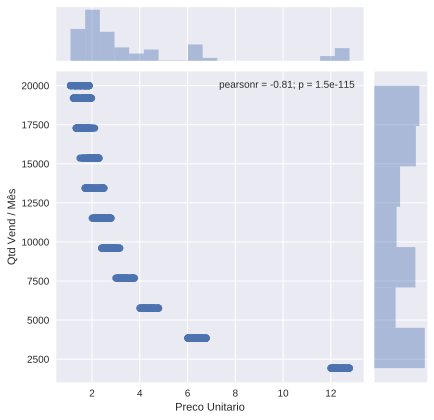

In [8]:
sns.jointplot(data= DF6, x='Preco Unitario', y='Qtd Vend / Mês')

### Analisando Custos


Uma vez que o problema não especifica maiores questões de estoque ou perecibilidade dos insumos, podemos simplificar o problema suponto todos os custos como fixos, sendo a quantidade e o valor negociado dos insumos informados no enunciado, como constantes.
    
    Nesse caso podemos descrever nosso custo mensal como:

In [9]:
bol = pd.DataFrame(columns=['Insumos','Custo Total Mês'])
bol['Insumos'] = ('Carne','Óleo','Sal','Tempero','Operação')
bol['Custo Total Mês'] = [4*2000,3.5*400,0.8*20,1*100,15000] #Custo unitário * Qtd Consumida por mês informada

bol

,Insumos,Custo Total Mês
0,Carne,8000.0
1,Óleo,1400.0
2,Sal,16.0
3,Tempero,100.0
4,Operação,15000.0


In [10]:
#Custo total da produção e de cada bolinho
total_prod= bol['Custo Total Mês'].sum()
custo_bol = total_prod/20000

print('Custo por cada bolinho ' + str(round(custo_bol,4)))
print('Custo total da produção ' + str(round(total_prod,4)))

Custo por cada bolinho 1.2258
Custo total da produção 24516.0


### Ajustando valores

Como podemos ver no gráfico 'Preco Unitario' x 'Qtd Vendas / Mês', parece haver uma "patameres" ou degrais, onde naquela faixa a variação do preço não parece alterar a demanda.

Podemos verificar isso tanto contando a quantidade repetidade valores ou invocando o número de valores únicos de demanda no nosso data set

In [11]:
DF6['Qtd Vend / Mês'].value_counts()

3840     54
13440    52
20000    51
1920     48
9600     46
11520    45
5760     43
17280    42
15360    42
19200    40
7680     37
Name: Qtd Vend / Mês, dtype: int64

In [12]:
DF6['Qtd Vend / Mês'].unique()

array([17280,  5760,  3840, 20000,  9600,  1920, 15360, 13440,  7680,
       19200, 11520])

In [13]:
degraus = list(DF6['Qtd Vend / Mês'].unique())
degraus

[17280, 5760, 3840, 20000, 9600, 1920, 15360, 13440, 7680, 19200, 11520]

Ora, como nosso objetivo é maximizar a relação lucro x demanda, podemos ajustar nossa curva, nos apegando simplesmente aos maiores valores em cada patamar

** É preciso ressaltar também que não podemos ignorar valores para onde o preço unitário é menor que o custo unitário levando a uma projeção absurda onde quanto menor o preço maior o lucro**

In [14]:
tdv = {lv:0 for lv in degraus}
lvn =[]
qvm = []

for lv in degraus:
    lista_aux = list(DF6[DF6['Qtd Vend / Mês'] == lv]['Preco Unitario'])
    for val_aux in lista_aux:
        if val_aux > custo_bol:
            tdv[lv]= DF6[DF6['Qtd Vend / Mês'] == lv]['Preco Unitario'].max()
        else:
            lvn.append(val_aux)
            qvm.append(lv)
            
            
# Construindo Data Frame a partir de valores de preço unitário maior que o preço de custo            
DF6a = pd.DataFrame.from_dict(tdv, orient ='index')
DF6a.reset_index(inplace = True)
DF6a.columns= ['Qtd Vend / Mês - Ajustado','Preco Unitario - Ajustado']

# Construindo Data Frame a partir de valores de preço unitário menor que o preço de custo
DF6b = pd.DataFrame(columns=['Qtd Vend / Mês - Ajustado','Preco Unitario - Ajustado'])
DF6b['Qtd Vend / Mês - Ajustado'] = qvm
DF6b['Preco Unitario - Ajustado'] = lvn

In [15]:
DF6a['Faturamento Ajustado'] = DF6a['Qtd Vend / Mês - Ajustado']*DF6a['Preco Unitario - Ajustado']
DF6a['Lucro Estimado'] = DF6a['Faturamento Ajustado'] - total_prod

DF6b['Faturamento Ajustado'] = DF6b['Qtd Vend / Mês - Ajustado']*DF6b['Preco Unitario - Ajustado']
DF6b['Lucro Estimado'] = DF6b['Faturamento Ajustado'] - total_prod

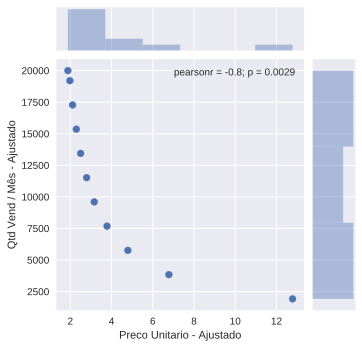

In [16]:
sns.jointplot(data= DF6a, x='Preco Unitario - Ajustado', y='Qtd Vend / Mês - Ajustado',size=5)

Para um melhor ajuste da nossa curva, podemos ignorar valores maiores que **4**

In [17]:
DF6a = DF6a[DF6a['Preco Unitario - Ajustado'] < 4]
DF6a

,Qtd Vend / Mês - Ajustado,Preco Unitario - Ajustado,Faturamento Ajustado,Lucro Estimado
0,17280,2.11,36460.8,11944.8
3,20000,1.88,37600.0,13084.0
4,9600,3.16,30336.0,5820.0
6,15360,2.29,35174.4,10658.4
7,13440,2.50,33600.0,9084.0
8,7680,3.78,29030.4,4514.4
9,19200,1.98,38016.0,13500.0
10,11520,2.79,32140.8,7624.8


In [18]:
DF6a[DF6a['Lucro Estimado'] == DF6a['Lucro Estimado'].max()]['Preco Unitario - Ajustado']

9    1.98
Name: Preco Unitario - Ajustado, dtype: float64

In [19]:
DF6b = DF6b[DF6b['Qtd Vend / Mês - Ajustado'] == 20000]
DF6b

,Qtd Vend / Mês - Ajustado,Preco Unitario - Ajustado,Faturamento Ajustado,Lucro Estimado
0,20000,1.10,22000.0,-2516.0
1,20000,1.17,23400.0,-1116.0
2,20000,1.18,23600.0,-916.0
3,20000,1.10,22000.0,-2516.0
4,20000,1.12,22400.0,-2116.0
5,20000,1.11,22200.0,-2316.0


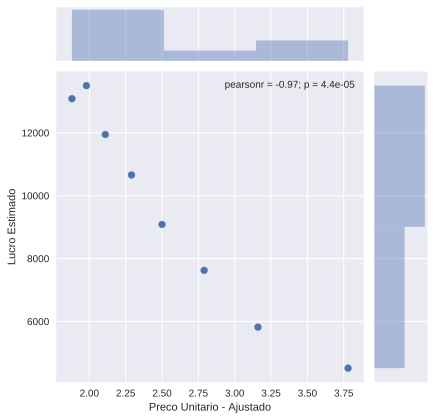

In [20]:
sns.jointplot(data= DF6a, x='Preco Unitario - Ajustado', y='Lucro Estimado')

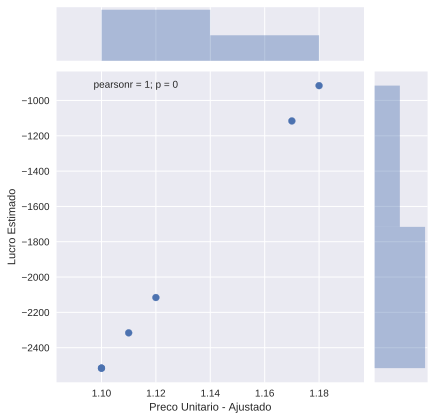

In [21]:
sns.jointplot(data= DF6b, x='Preco Unitario - Ajustado', y='Lucro Estimado')

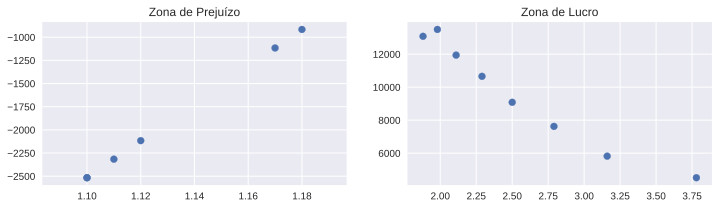

In [22]:
A = DF6a['Preco Unitario - Ajustado']
B = DF6a['Lucro Estimado']

C = DF6b['Preco Unitario - Ajustado']
D = DF6b['Lucro Estimado']


plt.figure(figsize = (12,3))

plt.subplot(1,2,2)
plt.scatter(A,B)
plt.title('Zona de Lucro')

plt.subplot(1,2,1)
plt.scatter(C,D)
plt.title('Zona de Prejuízo')

In [23]:
#Concatenando c

DF6c = DF6a.append(DF6b)
DF6c

,Qtd Vend / Mês - Ajustado,Preco Unitario - Ajustado,Faturamento Ajustado,Lucro Estimado
0,17280,2.11,36460.8,11944.8
3,20000,1.88,37600.0,13084.0
4,9600,3.16,30336.0,5820.0
6,15360,2.29,35174.4,10658.4
7,13440,2.50,33600.0,9084.0
8,7680,3.78,29030.4,4514.4
9,19200,1.98,38016.0,13500.0
10,11520,2.79,32140.8,7624.8
0,20000,1.10,22000.0,-2516.0
1,20000,1.17,23400.0,-1116.0


In [24]:
from scipy import stats
from matplotlib import pylab

In [25]:
# Generated linear fit 1
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(A,B)
line_a = slope_a*A + intercept_a

# Generated linear fit
slope_b, intercept_b, r_value_b, p_value_b, std_err_b = stats.linregress(C,D)
line_b = slope_b*C + intercept_b

In [26]:
preco_otimo = (intercept_b - intercept_a)/(slope_a - slope_b)
print (preco_otimo)

1.87378046464


In [27]:
lucro_otimo = preco_otimo*slope_b + intercept_b
print(lucro_otimo)

12959.6092928


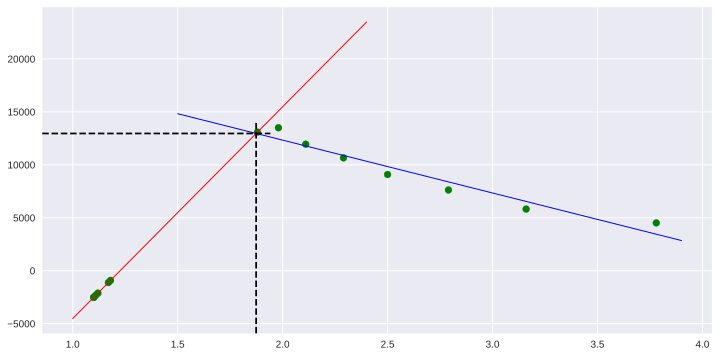

In [28]:
plt.figure(figsize =(12,6))

plt.scatter(x= DF6c['Preco Unitario - Ajustado'], y= DF6c['Lucro Estimado'], c='g', marker='o')

# Inserindo primeira reta de ajuste
x1 = np.arange(1,2.5,0.1)
y1 = x1*slope_b + intercept_b

plt.plot(x1,y1,c='r', lw=1)

# Inserindo segunda reta de ajuste
x2 = np.arange(1.5,4,0.1)
y2 = x2*slope_a + intercept_a

plt.plot(x2,y2, c='b', lw=1)

# Interceptando o cruzamento
plt.axhline(y= lucro_otimo,xmax= preco_otimo/5.5, ls='--', c='k')
plt.axvline(x= preco_otimo,ymax= lucro_otimo/20000, ls='--', c='k')

Como podemos verificar a partir do cruzamento das retas ajustadas para os dois setores temos uma excelente previsão de ponto ótimo no valor de **R$1,87**